## Dense network

Finally, try with neural networks
- 1-layer dense network i.e. no hidden layer, just the input and output ones
- 2-layer dense network i.e. one hidden layer

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler

- 1-layer dense network i.e. no hidden layer, just the input and output ones

In [2]:
model = Sequential()
model.add(Dense(
    units=6, activation=activations.softmax, input_dim=150528,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 903174    
Total params: 903,174
Trainable params: 903,174
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Define loss function, optimizer and metrics to track during training
model.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [4]:
train_generator = ImageDataGenerator(
    rescale=1/255, horizontal_flip=True, rotation_range=5)

valid_generator = ImageDataGenerator(rescale=1/255)

test_generator = ImageDataGenerator(rescale=1/255)

In [5]:
trainset = train_generator.flow_from_directory(
     'train', batch_size=32, target_size=(224, 224),
    shuffle=True, class_mode = 'sparse')
validset = valid_generator.flow_from_directory(
    'valid', batch_size=32, target_size=(224, 224),
    shuffle=False, class_mode = 'sparse')
testset = test_generator.flow_from_directory(
    'test', batch_size=32, target_size=(224, 224),
    shuffle=False, class_mode = 'sparse')

Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


In [6]:
trainset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

In [7]:
batch_imgs, batch_labels = trainset.next() # 32 images per batch

print('Batch images:', batch_imgs.shape) 
print('Batch labels:', batch_labels.shape)

Batch images: (32, 224, 224, 3)
Batch labels: (32,)


In [8]:
x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

for i in range(len(trainset)):
    batch_imgs, batch_labels = trainset.next()
    x_train.extend(batch_imgs)
    y_train.extend(batch_labels)
    

for i in range(len(validset)):
    batch_imgs, batch_labels = validset.next()
    x_valid.extend(batch_imgs)
    y_valid.extend(batch_labels)

for i in range(len(testset)):
    batch_imgs, batch_labels = testset.next()
    x_test.extend(batch_imgs)
    y_test.extend(batch_labels)


Flatten a RGB images:

224x224 = 50176

In [9]:
np.array(x_train).shape

(280, 224, 224, 3)

In [10]:
numImages = np.array(x_train).shape[0]
x_train = np.array([x_train[i].flatten() for i in range(0,numImages)])

In [11]:
x_train.shape

(280, 150528)

In [12]:
x_train = x_train.astype(float)

In [13]:
np.array(y_train).shape

(280,)

In [14]:
# Fit model
history = model.fit(
    x=x_train, y=np.array(y_train),
    validation_split=0.8, batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)

Train on 55 samples, validate on 225 samples
Epoch 1/50
55/55 [==============================] - 0s 6ms/step - loss: 5.7495 - acc: 0.2545 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 4/50
55/55 [==============================] - 0s 4ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 5/50
55/55 [==============================] - 0s 4ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 7/50
55/55 [==============================] - 0s 4ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.4187 - val_acc: 0.2267
Epoch 8/50
55/55 [==============

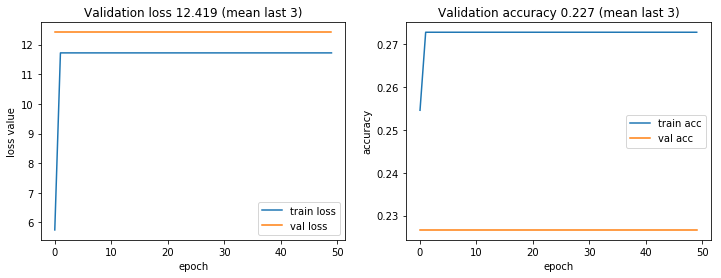

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

You can always implement a 1-layer
network (a network without a hidden layer) which is **equivalent to a Logistic Regression**
("softmax" strategy) and should return the **same accuracy** i.e. if you get 90% accuracy with
your logistic regression, then you should be able to get that score with your 1-layer dense
NN implementation.

--------

- 2-layer dense network i.e. one hidden layer

In [16]:
# Create model
model_2 = Sequential()

# First hidden layer
model_2.add(Dense(
    units=16, activation=activations.relu, input_dim=150528,
    kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0)))

# Second hidden layer = output layer
model_2.add(Dense(
    units=6, activation=activations.softmax,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0)))

# Print network summary
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                2408464   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 2,408,566
Trainable params: 2,408,566
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_2.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [18]:
# Fit model
history_2 = model_2.fit(
    x=x_train, y=np.array(y_train),
    validation_split=0.8, batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)

Train on 55 samples, validate on 225 samples
Epoch 1/50
55/55 [==============================] - 0s 8ms/step - loss: 2.1458 - acc: 0.1818 - val_loss: 2.1816 - val_acc: 0.0933
Epoch 2/50
55/55 [==============================] - 0s 5ms/step - loss: 2.0523 - acc: 0.0909 - val_loss: 1.8532 - val_acc: 0.0756
Epoch 3/50
55/55 [==============================] - 0s 5ms/step - loss: 1.8450 - acc: 0.1091 - val_loss: 1.8010 - val_acc: 0.1289
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 1.7978 - acc: 0.1818 - val_loss: 1.7904 - val_acc: 0.2267
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 1.7897 - acc: 0.2727 - val_loss: 1.7901 - val_acc: 0.2267
Epoch 6/50
55/55 [==============================] - 0s 5ms/step - loss: 1.7892 - acc: 0.2727 - val_loss: 1.7898 - val_acc: 0.2267
Epoch 7/50
55/55 [==============================] - 0s 6ms/step - loss: 1.7887 - acc: 0.2727 - val_loss: 1.7894 - val_acc: 0.2267
Epoch 8/50
55/55 [===========================

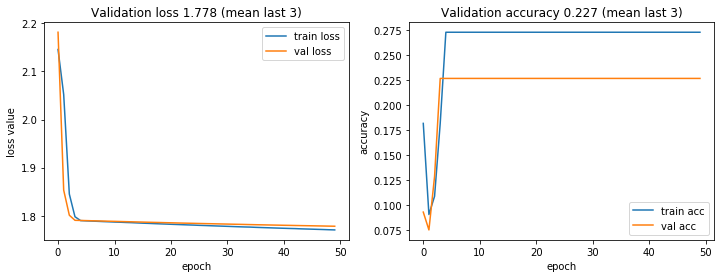

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history_2.history['loss'], label='train loss')
ax1.plot(history_2.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history_2.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history_2.history['acc'], label='train acc')
ax2.plot(history_2.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history_2.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

While both networks result in the same validation accuracy we get a much lower validation loss for the 2-layer network.

---------------

Store the model names and the accuracy on the test data in a .csv file:

In [20]:
numImages = np.array(x_test).shape[0]
x_test = np.array([x_test[i].flatten() for i in range(0,numImages)])

In [21]:
x_test = x_test.astype(float)

In [29]:
(test_loss_1, test_accuracy_1) = model.evaluate(x_test, np.array(y_test), batch_size=32)

print('Test loss: {:.2f}'.format(test_loss_1))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy_1))

50/50 [==============================] - 0s 836us/step
Test loss: 12.18
Test accuracy: 24.00%


In [31]:
(test_loss_2, test_accuracy_2) = model_2.evaluate(x_test, np.array(y_test), batch_size=32)

print('Test loss: {:.2f}'.format(test_loss_2))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy_2))

50/50 [==============================] - 0s 937us/step
Test loss: 1.77
Test accuracy: 24.00%


In [35]:
Test_accuracy_07_Dense_networks =  pd.DataFrame(data = {'model': ['1-layer nn', '2-layer nn'], 'test_acurracy': [test_accuracy_1,test_accuracy_2]})

In [37]:
Test_accuracy_07_Dense_networks.to_csv(path_or_buf = r'C:\Users\heyus\Desktop\Desktop\EPFL_Data Science COS\EPFL\04. Applied Machine Learning 2\11. Course project\Test_accuracy_07_Dense_networks.csv')